## Chapter 16: Advanced Plotting Features of Makie

One example that we will show here is how to write a type recipe, which will allow us to call an existing function (like `lines`) on a new user-defined Data Type.  

Recall that in Chapter 12 we made a `Polynomial` datatype with

In [1]:
struct Polynomial{T <: Number}
  coeffs::Vector{T}
end

It is also helpful to copy over the `Base.show` method and the `eval` method. 

In [2]:
Base.show(io::IO, p::Polynomial) = print(io, mapreduce(n -> "$(p.coeffs[n]) x^$(n-1)", (str, term) -> "$str $term", 1:length(p.coeffs)))

In [3]:
eval(poly::Polynomial, x::Number) = reduce((val,c) -> x*val+c, reverse(poly.coeffs))

eval (generic function with 2 methods)

And let's test that this works on a polynomial:

In [4]:
poly1=Polynomial([1,2,3])

1 x^0 2 x^1 3 x^2

Let's load Makie and CairoMakie

In [5]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

Now, we first tell Makie that we want to plot a polynomial with the `lines` method. 

In [6]:
Makie.plottype(::Polynomial) = Makie.Lines

And then we tell Makie how to plot the polynomial with

In [7]:
Makie.convert_arguments(S::Type{<:Lines}, p::Polynomial, domain = -5..5) = Makie.convert_arguments(S, domain, x->eval(p,x))


All this does is create the arguments to pass to `lines`.  In particular the domain like `-4..2` and the function and we use the Horner method `eval` to do this. 

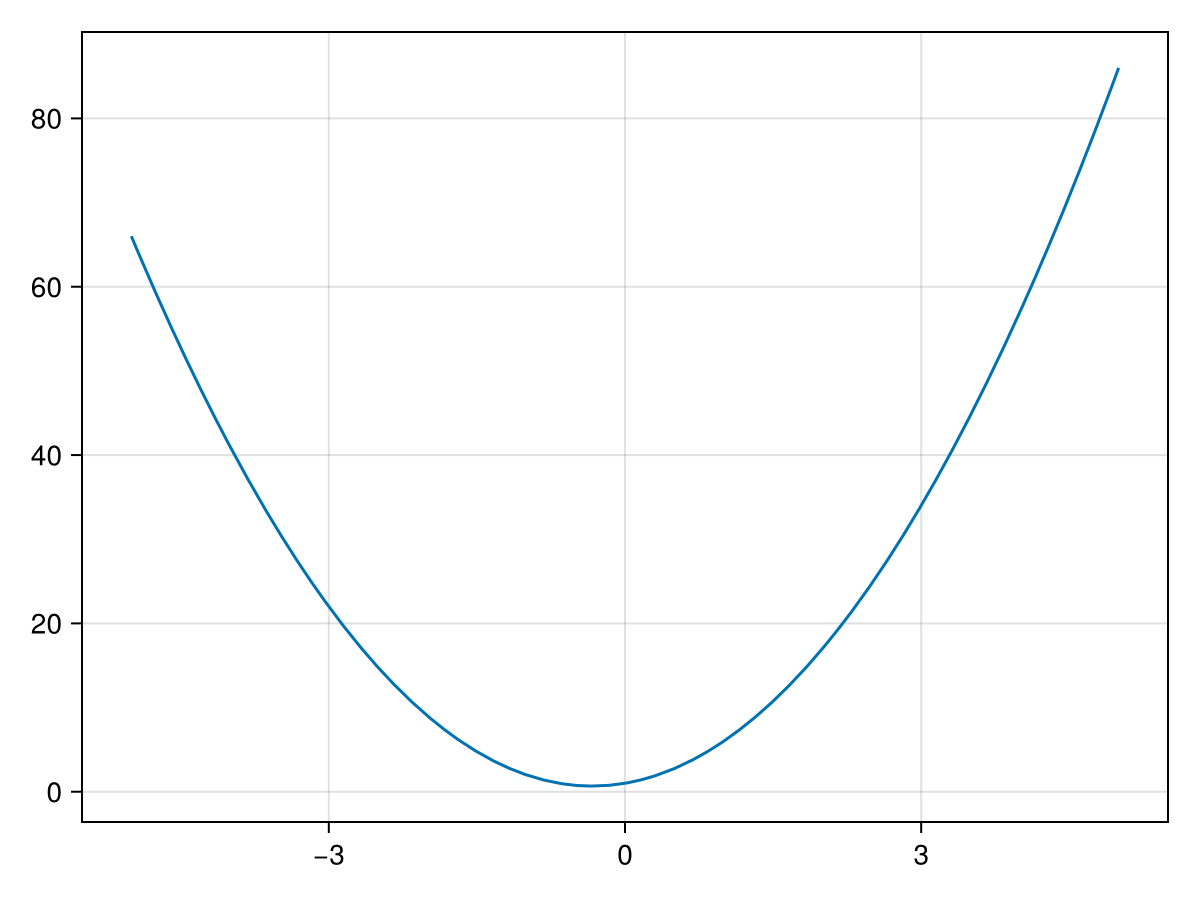

In [8]:
lines(poly1)

And this will use the default plotting domain of `-5..5` otherwise we can add in a different domain.

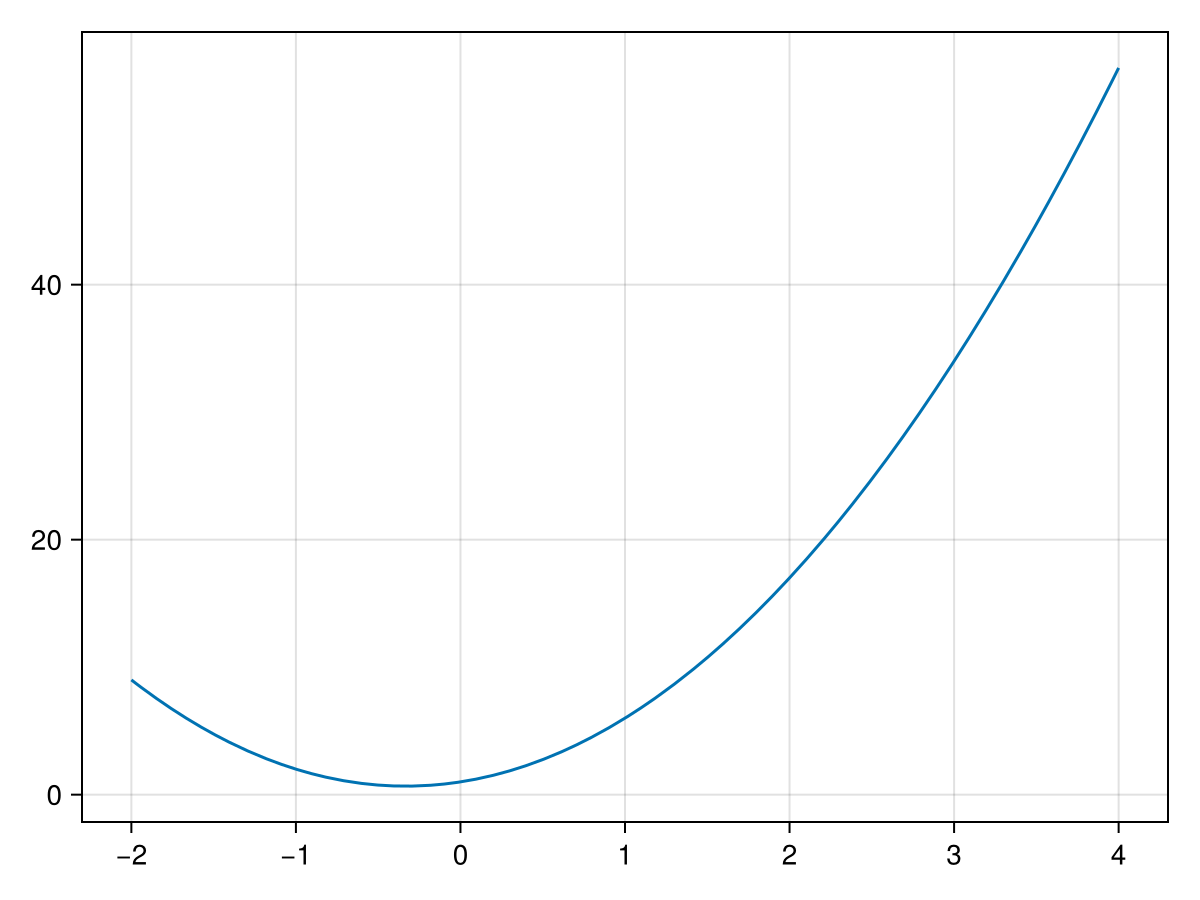

In [9]:
lines(poly1,-2..4)

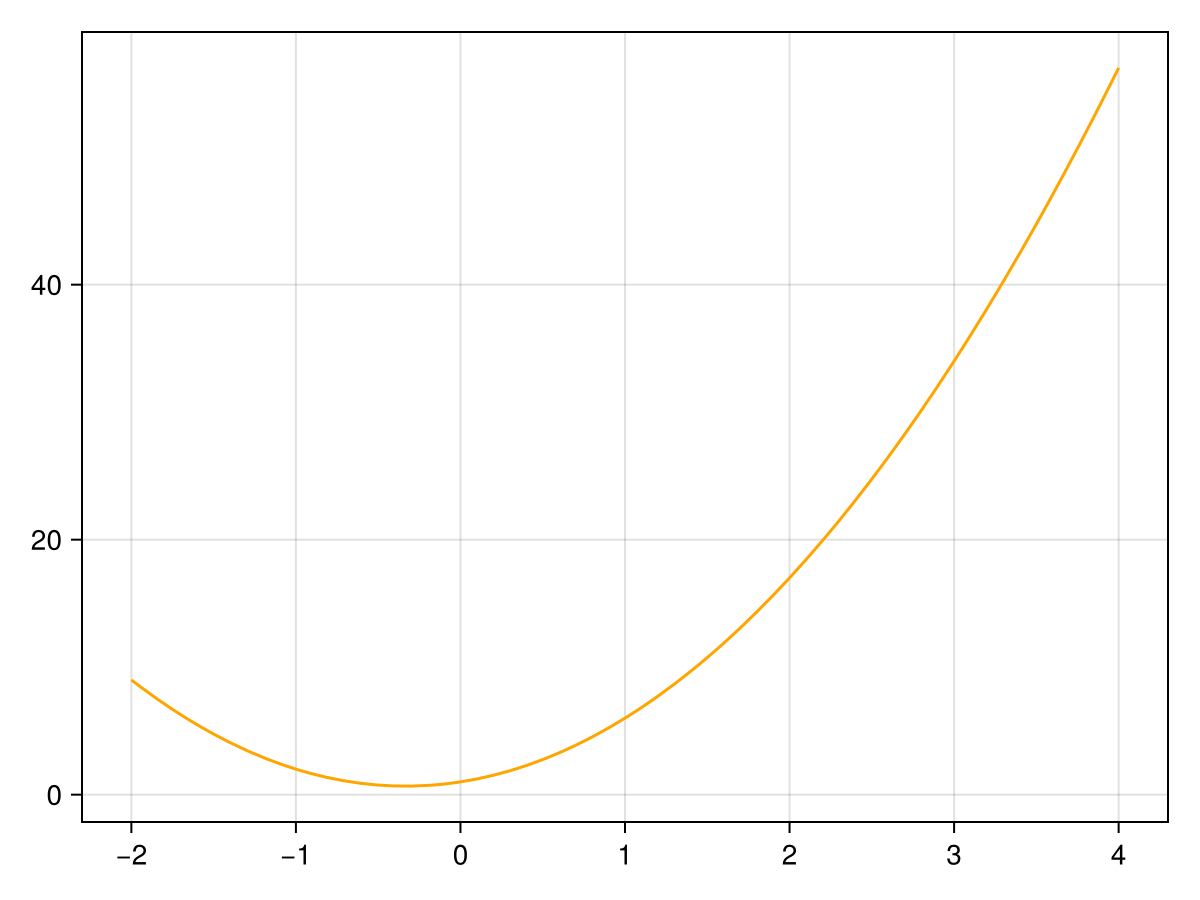

In [10]:
lines(poly1,-2..4,color=:orange)